In [214]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [215]:
#Loading Data
kiva = pd.read_csv('kiva_loans.csv')

In [216]:
kiva.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


In [217]:
kiva.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 666973 non-null  object 
 6   country_code        671197 non-null  object 
 7   country             671205 non-null  object 
 8   region              614405 non-null  object 
 9   currency            671205 non-null  object 
 10  partner_id          657698 non-null  float64
 11  posted_time         671205 non-null  object 
 12  disbursed_time      668809 non-null  object 
 13  funded_time         622874 non-null  object 
 14  term_in_months      671205 non-null  float64
 15  lender_count        671205 non-nul

In [218]:
kiva.isnull().sum()

id                         0
funded_amount              0
loan_amount                0
activity                   0
sector                     0
use                     4232
country_code               8
country                    0
region                 56800
currency                   0
partner_id             13507
posted_time                0
disbursed_time          2396
funded_time            48331
term_in_months             0
lender_count               0
tags                  171416
borrower_genders        4221
repayment_interval         0
date                       0
dtype: int64

## EDA

#### 1. What country got the most loans? Does the number of times a country is referenced relate to the quantity of loans it got?

In [219]:
#Duplicate record
kiva[kiva['id'].duplicated()]

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date


In [220]:
#Top countries
top_countries = kiva.groupby('country')[
    'id'].count().sort_values(ascending = False)
top_countries = top_countries.reset_index()
top_countries.columns = ['country', 'no_loans']

In [221]:
top_10 = top_countries.iloc[0:10]
top_10

,country,no_loans
0,Philippines,160441
1,Kenya,75825
2,El Salvador,39875
3,Cambodia,34836
4,Pakistan,26857
5,Peru,22233
6,Colombia,21995
7,Uganda,20601
8,Tajikistan,19580
9,Ecuador,13521


In [222]:
#Add Armenia for comparative Analysis
top_10 = pd.concat([top_10, top_countries[top_countries[
    'country'] == 'Armenia']], ignore_index = True)
top_10

,country,no_loans
0,Philippines,160441
1,Kenya,75825
2,El Salvador,39875
3,Cambodia,34836
4,Pakistan,26857
5,Peru,22233
6,Colombia,21995
7,Uganda,20601
8,Tajikistan,19580
9,Ecuador,13521


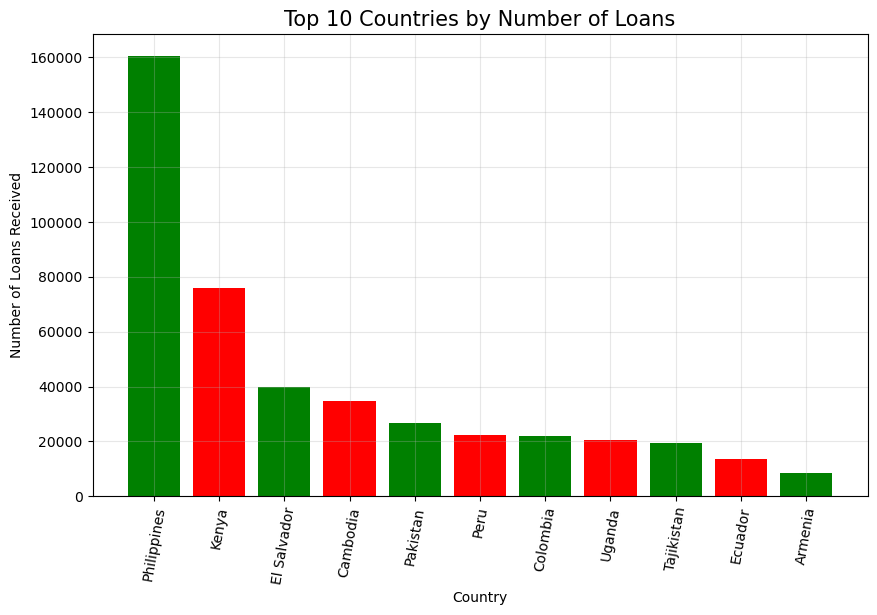

In [223]:
#Visualization
plt.rcParams['figure.figsize'] = (10, 6)
plt.bar(top_10['country'], top_10['no_loans'], color = np.resize([
    'Green', 'red'], 4))
plt.title('Top 10 Countries by Number of Loans', fontsize = 15)
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Number of Loans Received', fontsize = 10)
plt.xticks(rotation = 80)
plt.grid(True, alpha = 0.3)
plt.show()

In [224]:
#Country reference-loan received correlation
country_loan = kiva.groupby('country')[
    'loan_amount'].sum().reset_index()
country_loan.columns = ['country', 'tot_loan_amount']
country_loan

,country,tot_loan_amount
0,Afghanistan,14000.0
1,Albania,2666500.0
2,Armenia,12915400.0
3,Azerbaijan,2888700.0
4,Belize,114025.0
...,...,...
82,Vietnam,14891450.0
83,Virgin Islands,10000.0
84,Yemen,1879950.0
85,Zambia,1210675.0


In [225]:
#merge top_countries and country_loan
Loans_Quantity_Country = pd.merge(
    top_countries, country_loan, on = 'country')
Loans_Quantity_Country.head(10)

,country,no_loans,tot_loan_amount
0,Philippines,160441,55342225.0
1,Kenya,75825,34534300.0
2,El Salvador,39875,26603650.0
3,Cambodia,34836,19872700.0
4,Pakistan,26857,13294750.0
5,Peru,22233,30867400.0
6,Colombia,21995,14415600.0
7,Uganda,20601,15389350.0
8,Tajikistan,19580,15030350.0
9,Ecuador,13521,15000275.0


In [226]:
#Correlation
Loans_Quantity_Country['no_loans'].corr(
    Loans_Quantity_Country['tot_loan_amount'])

0.8103374823171925

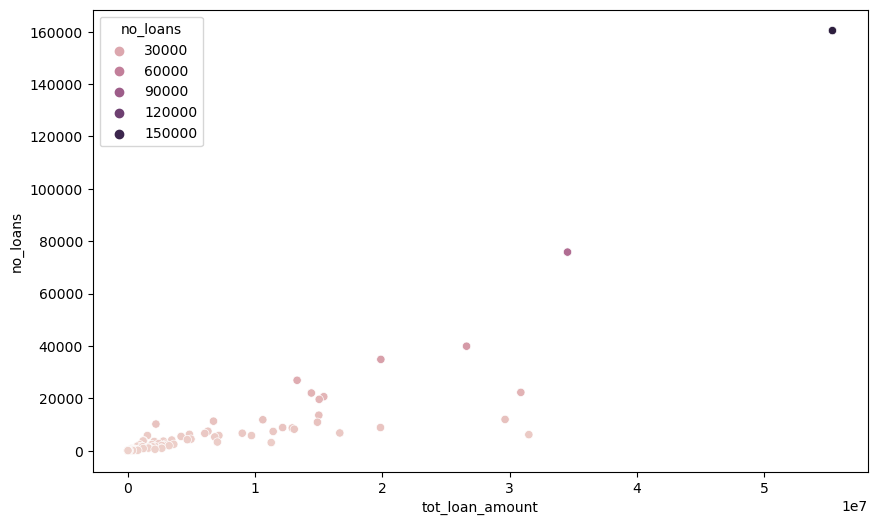

In [227]:
#Relationship Visualization
plt.figure(figsize = (10, 6))
sns.scatterplot(data = Loans_Quantity_Country, y = 'no_loans', 
           x = 'tot_loan_amount', hue = 'no_loans')

plt.show()

###### Conclusions
> 1. Armenia not among the top receivers of loan (No 17)
> 2. Armenia receiving appr. an 1/8 of the number loans received by leading country (Philppines)
> 2. Strong r/ship between country reference and Loan Quantity

#### 2. What sector got the most loans? Does the number of times a sector is referenced relate to the quantity of loans it got? 

> (Nationally)

In [228]:
#Subset Armenian Records
armenia_loans = kiva[kiva['country'] == 'Armenia']
armenia_loans.reset_index(drop = True)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,655757,1500.0,1500.0,Sewing,Services,to purchase materials for sewing,AM,Armenia,Armavir,AMD,169.0,2014-01-09 13:03:30+00:00,2013-12-24 08:00:00+00:00,2014-01-18 16:08:02+00:00,27.0,58,"#Fabrics, #First Loan, #Woman Owned Biz",female,monthly,2014-01-09
1,655724,1250.0,1250.0,Furniture Making,Manufacturing,to pay for materials for furniture making,AM,Armenia,Goris,AMD,169.0,2014-01-09 12:06:07+00:00,2013-12-27 08:00:00+00:00,2014-01-12 04:39:58+00:00,26.0,36,"user_favorite, user_favorite, #Parent",male,monthly,2014-01-09
2,655703,750.0,750.0,Retail,Retail,to pay for new flower seeds and flowers for se...,AM,Armenia,Goris,AMD,169.0,2014-01-09 11:45:25+00:00,2013-12-28 08:00:00+00:00,2014-01-17 20:19:53+00:00,27.0,25,"user_favorite, #Woman Owned Biz, user_favorite",female,monthly,2014-01-09
3,655697,300.0,1500.0,Taxi,Transportation,to pay for new tires and to renovate his car.,AM,Armenia,Gyumri,AMD,169.0,2014-01-09 11:32:21+00:00,2013-12-10 08:00:00+00:00,NaN,26.0,5,"#Parent, user_favorite",male,monthly,2014-01-09
4,655770,500.0,500.0,Higher education costs,Education,to pay for her university tuition.,AM,Armenia,"Mayisyan village, Armavir region",AMD,169.0,2014-01-09 13:50:52+00:00,2013-12-10 08:00:00+00:00,2014-01-10 10:43:53+00:00,14.0,18,user_favorite,female,monthly,2014-01-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8626,1335708,75.0,1500.0,Farming,Agriculture,to fence her garden and also to buy a lot of y...,AM,Armenia,Ijevan,USD,146.0,2017-07-07 08:37:51+00:00,2017-06-27 07:00:00+00:00,NaN,26.0,3,"user_favorite, #Trees",female,monthly,2017-07-07
8627,1335773,0.0,1675.0,Education provider,Education,to buy a computer and professional pedagogical...,AM,Armenia,Stepanavan,AMD,146.0,2017-07-07 09:38:42+00:00,2017-06-29 07:00:00+00:00,NaN,38.0,0,"#Technology, #Elderly, #Schooling, #Female Edu...",female,monthly,2017-07-07
8628,1335640,0.0,950.0,Cattle,Agriculture,to purchase forage for her cattle.,AM,Armenia,"Koghb village, Tavush region",AMD,169.0,2017-07-07 07:25:38+00:00,2017-06-28 07:00:00+00:00,NaN,30.0,0,#Animals,female,monthly,2017-07-07
8629,1335598,600.0,1675.0,Beekeeping,Agriculture,to purchase beehives.,AM,Armenia,"Aghitu village, Syunik region",AMD,169.0,2017-07-07 06:28:31+00:00,2017-07-06 07:00:00+00:00,NaN,30.0,17,"#Animals, #Biz Durable Asset, #Eco-friendly, #...",female,monthly,2017-07-07


In [229]:
armenia_loans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8631 entries, 2324 to 670449
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  8631 non-null   int64  
 1   funded_amount       8631 non-null   float64
 2   loan_amount         8631 non-null   float64
 3   activity            8631 non-null   object 
 4   sector              8631 non-null   object 
 5   use                 8628 non-null   object 
 6   country_code        8631 non-null   object 
 7   country             8631 non-null   object 
 8   region              8626 non-null   object 
 9   currency            8631 non-null   object 
 10  partner_id          8631 non-null   float64
 11  posted_time         8631 non-null   object 
 12  disbursed_time      8631 non-null   object 
 13  funded_time         6806 non-null   object 
 14  term_in_months      8631 non-null   float64
 15  lender_count        8631 non-null   int64  
 16  tags  

> Date/Partner id/funded time/Disbursed time - data type wrongly assigned

In [230]:
armenia_loans.isna().sum()

id                       0
funded_amount            0
loan_amount              0
activity                 0
sector                   0
use                      3
country_code             0
country                  0
region                   5
currency                 0
partner_id               0
posted_time              0
disbursed_time           0
funded_time           1825
term_in_months           0
lender_count             0
tags                   480
borrower_genders         3
repayment_interval       0
date                     0
dtype: int64

In [231]:
sector = armenia_loans.groupby('sector')['id'].count().sort_values(
    ascending = False).reset_index()
sector.columns = ['sector', 'no_loans']
sector

,sector,no_loans
0,Agriculture,4630
1,Education,1293
2,Health,748
3,Services,389
4,Food,361
5,Clothing,263
6,Retail,260
7,Transportation,184
8,Personal Use,162
9,Construction,144


In [232]:
#Percentage of loans in agri
X = sector['no_loans'].sum() - 4630
agri_percentage = 4630/(sector['no_loans'].sum())
agri_percentage*100

53.643841965009855

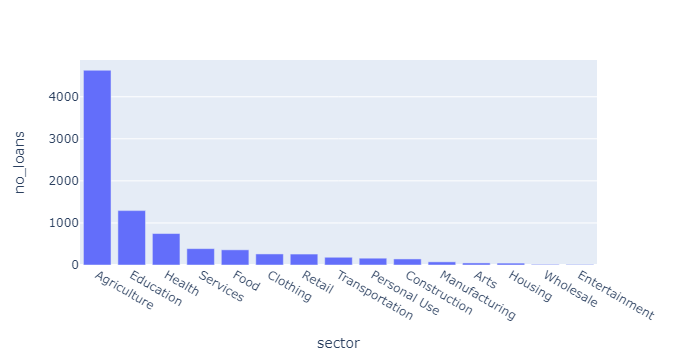

In [233]:
px.bar(data_frame = sector, x = 'sector', y = 'no_loans')

In [234]:
#total loan amount pers sector
loan_r = armenia_loans.groupby('sector')['loan_amount'].sum().reset_index()
loan_r.columns = ['sector', 'tot_loan_rec']
loan_r

,sector,tot_loan_rec
0,Agriculture,7587550.0
1,Arts,63225.0
2,Clothing,360025.0
3,Construction,162475.0
4,Education,1592575.0
5,Entertainment,18675.0
6,Food,523000.0
7,Health,1088575.0
8,Housing,52125.0
9,Manufacturing,119550.0


In [235]:
#Merging two for corr examination
loan_by_sector = pd.merge(sector, loan_r, on = 'sector')
loan_by_sector

,sector,no_loans,tot_loan_rec
0,Agriculture,4630,7587550.0
1,Education,1293,1592575.0
2,Health,748,1088575.0
3,Services,389,522525.0
4,Food,361,523000.0
5,Clothing,263,360025.0
6,Retail,260,401250.0
7,Transportation,184,226300.0
8,Personal Use,162,175275.0
9,Construction,144,162475.0


In [236]:
#Correlation
loan_by_sector['no_loans'].corr(
    loan_by_sector['tot_loan_rec'])

0.9976856219691491

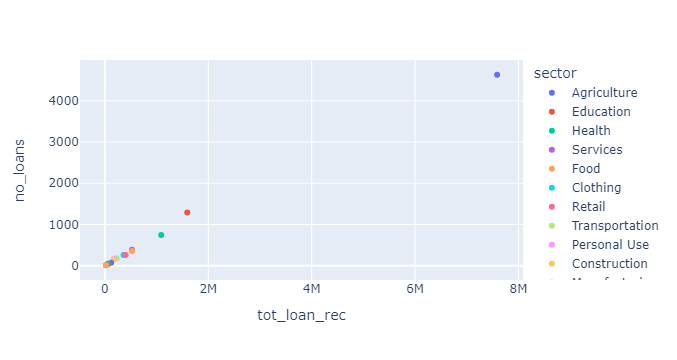

In [237]:
px.scatter(loan_by_sector, y = 'no_loans', 
           x = 'tot_loan_rec', color = 'sector')

###### Conclusions
> 1. Agriculure - Receiving hightest number of loans/Almost equiv of all other sectors & Quantity
> 2. Entertainment - Least number of loans & Quantity
> 3. Strong r/ship between No_of_loan & Quantity of Loan

#### 3. For the top sector, what activity had the highest amount of loans? What does that say about that activity?

In [238]:
#Subsetting based on agri
agri_sector = armenia_loans[armenia_loans[
    'sector'] == 'Agriculture']
agri_sector.reset_index(drop = True).head(5)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,656185,3000.0,3000.0,Agriculture,Agriculture,to pay for forage for feeding the livestock,AM,Armenia,"Ashotavan community, Syunik region",USD,169.0,2014-01-10 15:15:12+00:00,2013-12-11 08:00:00+00:00,2014-01-30 03:19:06+00:00,26.0,99,"#Animals, #First Loan, #Vegan, #Eco-friendly, ...",female,monthly,2014-01-10
1,656600,3000.0,3000.0,Agriculture,Agriculture,to pay for the renovation of the greenhouse as...,AM,Armenia,"Margara village, Armavir region",USD,169.0,2014-01-13 10:28:24+00:00,2013-12-20 08:00:00+00:00,2014-01-22 17:17:48+00:00,26.0,90,"#Schooling, #Single Parent, user_favorite",female,monthly,2014-01-13
2,656538,2500.0,2500.0,Livestock,Agriculture,"to pay for 2 cows, 2 oxen and forage for feedi...",AM,Armenia,Dalarik village of Armavir region,USD,169.0,2014-01-13 08:09:08+00:00,2013-12-16 08:00:00+00:00,2014-01-26 09:42:28+00:00,26.0,60,"#Supporting Family, user_favorite",female,monthly,2014-01-13
3,656534,1500.0,1500.0,Livestock,Agriculture,to pay for three calves,AM,Armenia,"Qarakert village, Armavir region",USD,169.0,2014-01-13 07:52:45+00:00,2013-12-17 08:00:00+00:00,2014-01-29 17:33:09+00:00,26.0,44,"#Animals, #Woman Owned Biz, user_favorite",female,monthly,2014-01-13
4,656707,1300.0,1300.0,Agriculture,Agriculture,to pay for renovation of the greenhouse,AM,Armenia,"Ghukasavan village, Ararat region",USD,169.0,2014-01-13 13:59:13+00:00,2013-12-17 08:00:00+00:00,2014-01-17 18:22:55+00:00,38.0,48,"#First Loan, #Biz Durable Asset, #Vegan",female,monthly,2014-01-13


In [239]:
#Creating a table for common act in agriculture sector
common_act = agri_sector.groupby('activity')[
    'loan_amount'].sum().sort_values(
    ascending = False).reset_index()
common_act.columns = ['activity', 'loan_amount']
common_act

,activity,loan_amount
0,Farming,3938850.0
1,Livestock,1366125.0
2,Agriculture,984275.0
3,Cattle,550775.0
4,Pigs,270675.0
5,Farm Supplies,197150.0
6,Dairy,165225.0
7,Beekeeping,44775.0
8,Poultry,31200.0
9,Flowers,21450.0


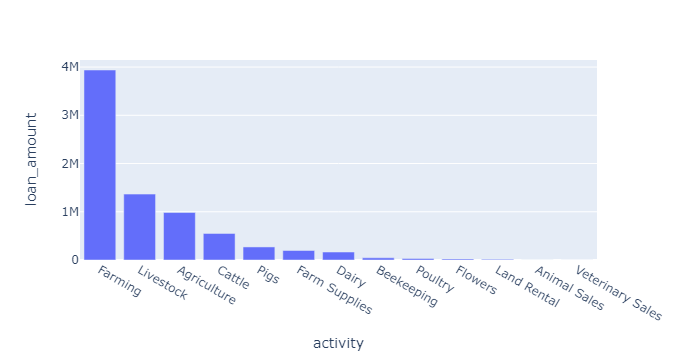

In [240]:
px.bar(common_act, y = 'loan_amount', x = 'activity')

###### Conclusion
> 1. Farming - Highest Loan amount

#### 4. Which region had the highest loan amounts?

In [241]:
#Subsetting
region = armenia_loans.groupby('region')[
    'loan_amount'].sum().sort_values(
    ascending = False).reset_index()
region.columns = ['region', 'loan_amount']

In [242]:
region.head()

,region,loan_amount
0,Gegharkunik region,1348525.0
1,Sevan,757675.0
2,Kapan,575925.0
3,Vanadzor,561450.0
4,"Kapan, Syunik region",529400.0


In [243]:
x_r = region.head(10)
x_r

,region,loan_amount
0,Gegharkunik region,1348525.0
1,Sevan,757675.0
2,Kapan,575925.0
3,Vanadzor,561450.0
4,"Kapan, Syunik region",529400.0
5,Yerevan,431425.0
6,Tavush region,385850.0
7,Vanadzor town,309200.0
8,Ijevan,242075.0
9,Goris,202200.0


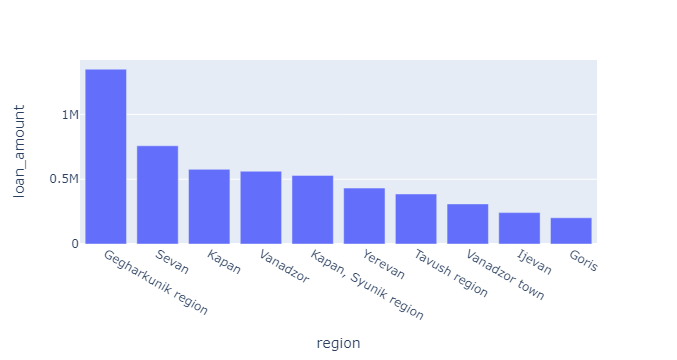

In [244]:
px.bar(x_r, x = 'region', y = 'loan_amount')

#### Conclusion
> Gegharkunik region - Highest loan amount received

#### 5. What does the loan amount look like for various repayment interval? In various sectors? In various activities?

In [245]:
loan_sector = pd.pivot_table(armenia_loans
                             , index = 'sector', columns = 
                             'repayment_interval', values = 
                             'loan_amount', aggfunc = 'sum')
loan_sector = loan_sector.sort_values(by ='monthly', ascending = False)

In [246]:
loan_sector = loan_sector.fillna(0)
loan_sector

repayment_interval,bullet,irregular,monthly
sector,,,
Agriculture,40000.0,0.0,7547550.0
Education,0.0,438075.0,1154500.0
Health,0.0,0.0,1088575.0
Services,0.0,0.0,522525.0
Food,2900.0,0.0,520100.0
Retail,0.0,0.0,401250.0
Clothing,0.0,1450.0,358575.0
Transportation,0.0,225.0,226075.0
Personal Use,0.0,0.0,175275.0


In [247]:
loan_activity = pd.pivot_table(armenia_loans
                               , index = 'activity', columns = 
                      'repayment_interval'
                               , values = 'loan_amount'
                               , aggfunc = 'sum')
loan_activity = loan_activity.sort_values(
    by = 'monthly', ascending = False)

In [248]:
loan_activity = loan_activity.fillna(0)
loan_activity.head(60)
#act fewer than 

repayment_interval,bullet,irregular,monthly
activity,,,
Farming,21000.0,0.0,3917850.0
Livestock,3000.0,0.0,1363125.0
Personal Medical Expenses,0.0,0.0,1021375.0
Agriculture,2000.0,0.0,982275.0
Education provider,0.0,0.0,870875.0
Cattle,11000.0,0.0,539775.0
Clothing Sales,0.0,1450.0,350600.0
Higher education costs,0.0,438075.0,277325.0
Pigs,0.0,0.0,270675.0


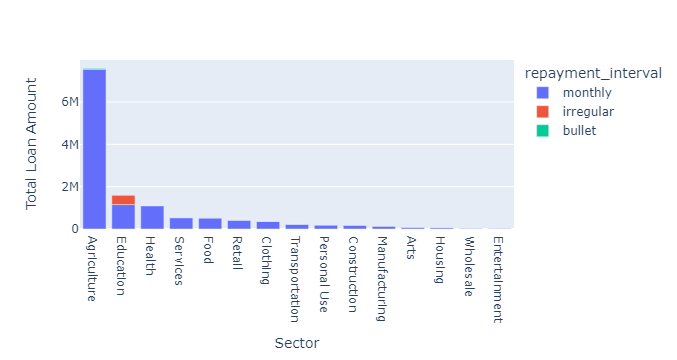

In [249]:
#Visualization for loan amount per sector
loan_sect_vis = armenia_loans.groupby(['sector', 'repayment_interval'])[
    'loan_amount'].sum().reset_index().sort_values(
    by = 'loan_amount', ascending = False)
loan_sect_vis.columns = ['sector', 
                         'repayment_interval', 'loan_amount']

#Plotting
px.bar(loan_sect_vis, x = 'sector', y = 
       'loan_amount', color = 'repayment_interval'
       , labels = {'sector': 'Sector', 'loan_amount': 'Total Loan Amount'})

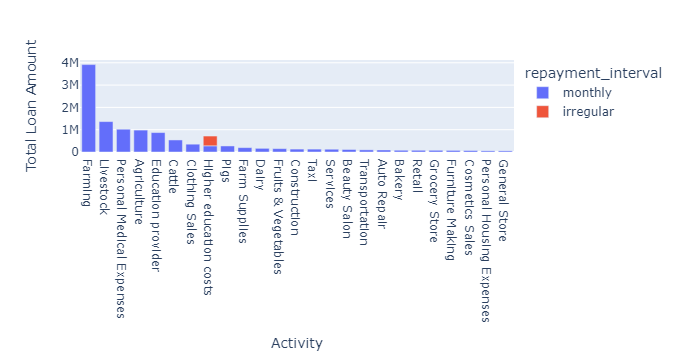

In [250]:
#Visualization for loan amount per act
loan_act_vis = armenia_loans.groupby(['activity', 'repayment_interval'])[
    'loan_amount'].sum().reset_index().sort_values(
    by = 'loan_amount', ascending = False)
loan_act_vis.columns = ['activity', 'repayment_interval', 'loan_amount']

#Removing act with loans lower than 50,000
loan_act_vis = loan_act_vis[loan_act_vis['loan_amount'] >= 50000]

#Plotting
px.bar(loan_act_vis, x = 'activity', y = 'loan_amount'
       , color = 'repayment_interval', labels = {'activity': 'Activity'
                                                 , 'loan_amount': 'Total Loan Amount'})

#### 6. What were the numbers between male and female recipients? Does that communicate anything?


In [251]:
armenia_loans.isna().sum()

id                       0
funded_amount            0
loan_amount              0
activity                 0
sector                   0
use                      3
country_code             0
country                  0
region                   5
currency                 0
partner_id               0
posted_time              0
disbursed_time           0
funded_time           1825
term_in_months           0
lender_count             0
tags                   480
borrower_genders         3
repayment_interval       0
date                     0
dtype: int64

In [252]:
#dropping the null gender record
loan_gender = armenia_loans.dropna(subset = ['borrower_genders'])
loan_gender['borrower_genders'].value_counts()

borrower_genders
female    5383
male      3245
Name: count, dtype: int64

In [253]:
loanee_gender = loan_gender['borrower_genders'].value_counts().reset_index()
female = loanee_gender.loc[0,'count']/loanee_gender['count'].sum()*100
print(f'The percentage of female borrowers is {female:.3f}')
print(f'The percentage of male borrowers is {100-female:.3f}')

The percentage of female borrowers is 62.390
The percentage of male borrowers is 37.610


In [254]:
#Loan acquisition by Gender and sector
loan_gender_sect = armenia_loans.groupby([
    'borrower_genders', 'sector'])['id'].count().reset_index()
loan_gender_sect = loan_gender_sect.sort_values(
    by = 'id', ascending = False)
loan_gender_sect = loan_gender_sect[loan_gender_sect['id'] >=100]
loan_gender_sect

,borrower_genders,sector,id
0,female,Agriculture,3112
15,male,Agriculture,1516
4,female,Education,984
7,female,Health,392
22,male,Health,355
19,male,Education,309
2,female,Clothing,240
27,male,Services,234
6,female,Food,195
28,male,Transportation,173


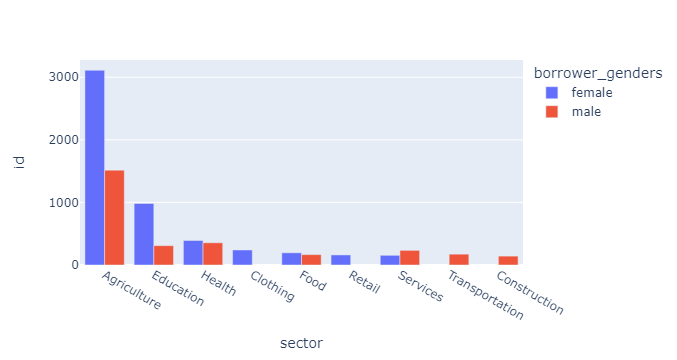

In [255]:
px.bar(loan_gender_sect, x = 
       'sector', y = 'id', color = 
       'borrower_genders', barmode = 'group')

#### Conclusions
>Females taking more loans (62.3%)- Segment marketing

> ###### Leading 4 Sectors by gender (High-Low) 

1: Females : Agri, Edu, Health, Clothing

2: Males: Agri, Health, Edu, Services

#### 7. Sector with highest loans globally 

In [256]:
kiva_sector = kiva.groupby('sector')[
    'loan_amount'].sum().sort_values(ascending = False).reset_index()
kiva_sector.columns = ['sector', 'loan_amount']
kiva_sector

,sector,loan_amount
0,Agriculture,143067875.0
1,Food,121606150.0
2,Retail,98122900.0
3,Services,48057450.0
4,Clothing,37300925.0
5,Education,30968525.0
6,Housing,23663950.0
7,Personal Use,14955350.0
8,Arts,12240325.0
9,Transportation,11066900.0


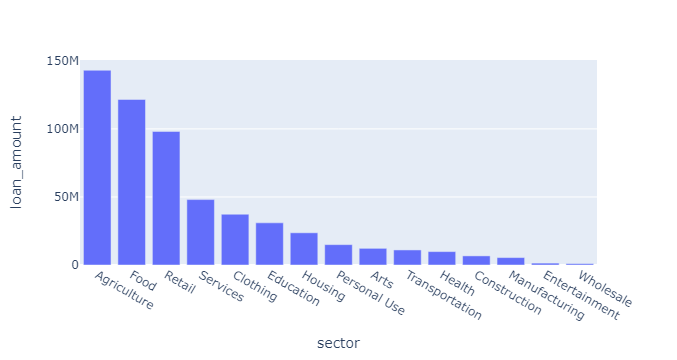

In [257]:
px.bar(kiva_sector, x = 'sector', y = 'loan_amount')

#### 7. Region with highest loans globally 

In [258]:
kiva_region = kiva.groupby('region')[
    'loan_amount'].sum().sort_values(
    ascending = False).reset_index()
kiva_region.columns = ['region', 'loan_amount']
kiva_region = kiva_region.head(20)
kiva_region

,region,loan_amount
0,"Goma, North Kivu province",7397975.0
1,La Paz / El Alto,6838300.0
2,Cusco,6222075.0
3,Dar es Salaam,5113875.0
4,Lahore,3984575.0
5,Thanh Hoá,3718125.0
6,San Lorenzo,3428050.0
7,Santa Cruz,3206375.0
8,Mai Sơn - Sơn La,2672200.0
9,Ita,2569850.0


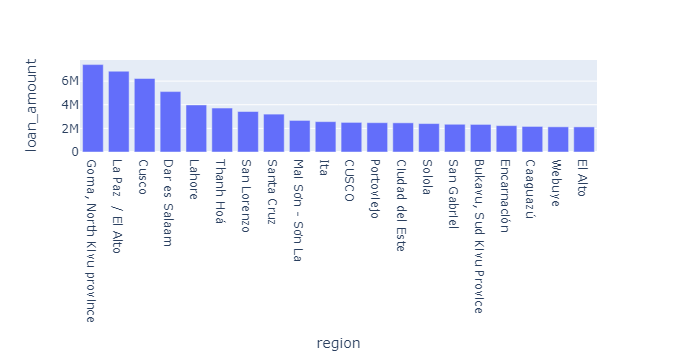

In [259]:
px.bar(kiva_region, x = 'region', y = 'loan_amount')

# VISUALIZATION QUESTIONS

#### 1. The top 10 loan activities in the data (Armenia).

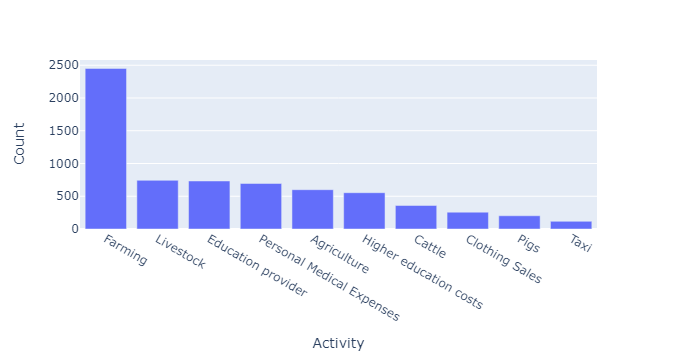

In [260]:
# Subsetting
arm_act = armenia_loans.groupby('activity')[
    'id'].count().sort_values(ascending = False).reset_index()
arm_act = arm_act.head(10)
arm_act.columns = ['Activity', 'Count']
arm_act
#Visualization
px.bar(arm_act, x = 'Activity', y = 'Count')

#### 2. The most dominant field partners.

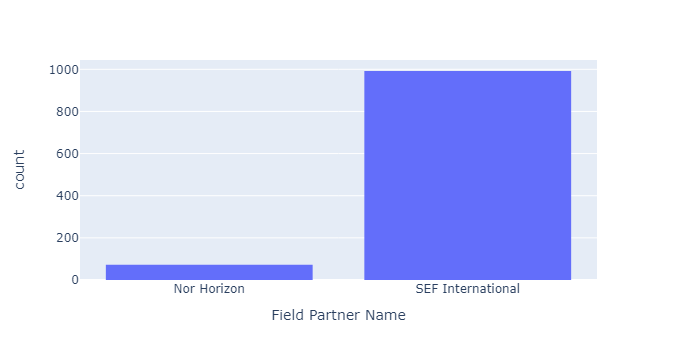

In [261]:
loan_themes_partner = pd.read_csv('loan_themes_by_region.csv')
loan_themes_partner_armenia = loan_themes_partner[loan_themes_partner[
    'country'] == 'Armenia']
# c = loan_themes_partner_armenia['Field Partner Name'].value_counts()
#Visualization
px.histogram(loan_themes_partner_armenia, x = 'Field Partner Name')

#### 3. The partner names and their total loan amount

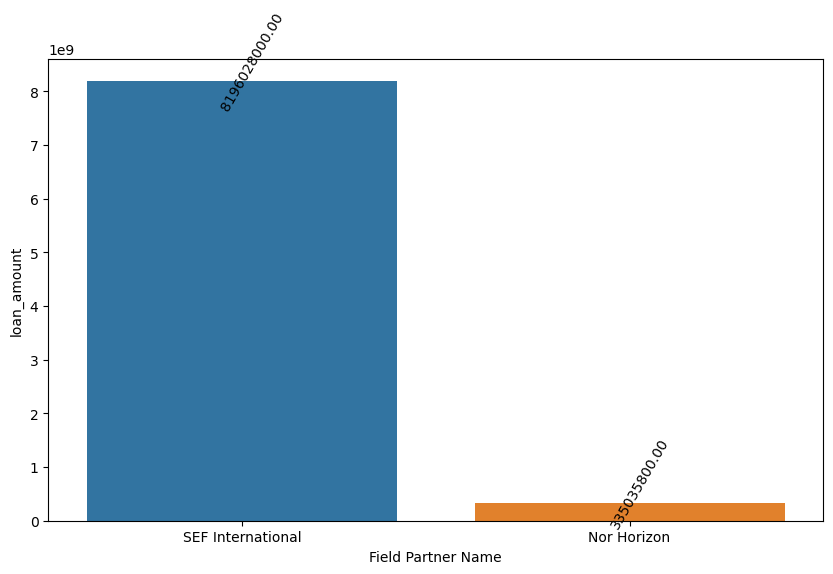

In [262]:
# Merging Armenia Loans & Loan_themese by region

armenia_loans_partner_merged = pd.merge(armenia_loans,loan_themes_partner_armenia
                                        , left_on = 'partner_id', right_on = 'Partner ID')
#Visualization
ax = sns.barplot(data = armenia_loans_partner_merged, x = 
            'Field Partner Name', y = 'loan_amount', errorbar = None, estimator = np.sum)
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha = 'center', va = 'center', rotation = 60, xytext = (10, 20), textcoords = 'offset pixels')
plt.show()

#### 4. The partner names and their total amounts.

C:\Users\dicks\AppData\Local\Temp\ipykernel_17308\240087554.py:1: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




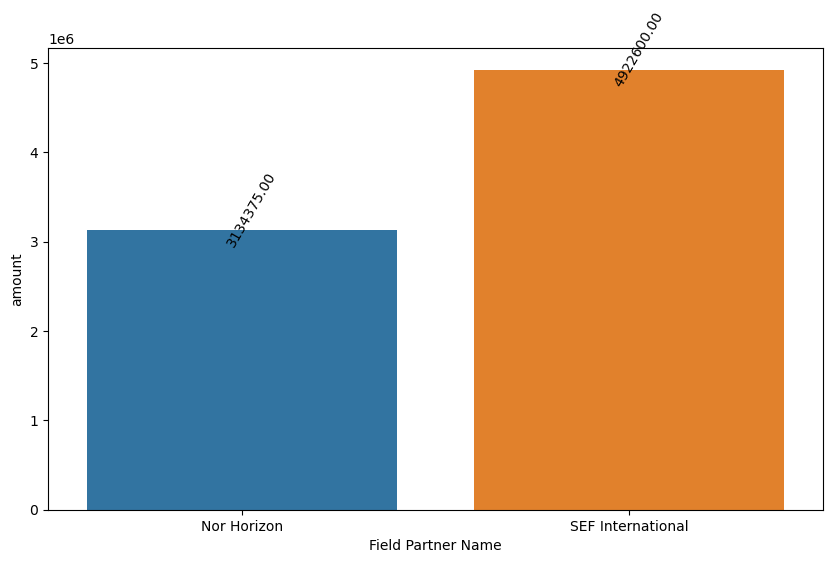

In [263]:
ax = sns.barplot(data = loan_themes_partner_armenia, x = 
            'Field Partner Name', y = 'amount', ci = None, estimator = np.sum)
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha = 'center', va = 'center', rotation = 60, xytext = (10, 20), textcoords = 'offset pixels')
plt.show()

#### 5. The partner names and their total number of loans. (Consider 1)

#### 6. Top reasons for giving a loan.

In [264]:
# Based on Activity to compare with Use-based analysis
reason_act = armenia_loans['activity'].value_counts().reset_index()
reason_act  = reason_act[0:10]
reason_act 

,activity,count
0,Farming,2451
1,Livestock,743
2,Education provider,733
3,Personal Medical Expenses,695
4,Agriculture,600
5,Higher education costs,554
6,Cattle,359
7,Clothing Sales,257
8,Pigs,202
9,Taxi,117


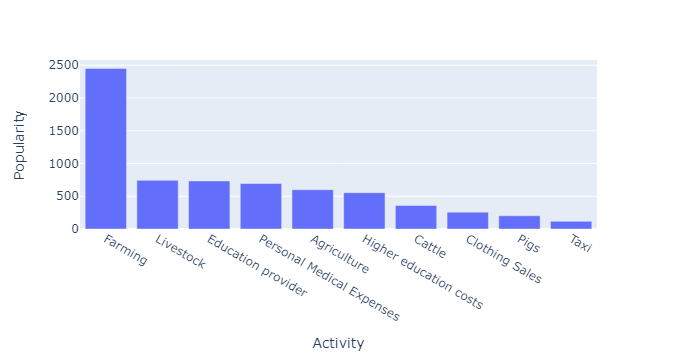

In [265]:
px.bar(reason_act, x = 'activity', y = 'count'
       , labels = {'activity':'Activity', 'count': 'Popularity'})

In [266]:
#Based on Use
reason = armenia_loans['use'].value_counts().reset_index()
reason.head(30)

,use,count
0,to pay for university tuition,26
1,to pay for university tuition.,21
2,to pay for forage for feeding the livestock,17
3,to pay for forage for feeding the livestock.,9
4,to buy a computer and professional literature.,9
5,to purchase forage.,8
6,to buy fodder for his farm cattle.,8
7,to buy one more cow for her farm and also fodd...,8
8,to pay for a cow and forage for feeding the li...,7
9,to pay for three cows,6


In [267]:
reason.columns = ['Use', 'Count']
reason['Use'] = reason['Use'].str.replace('.', '')

In [268]:
reason2 = reason.groupby('Use')['Count'].sum().reset_index().sort_values(by = 'Count', ascending = False)
#Top 10 uses
reason_10 = reason2.head(10)
reason_10

,Use,Count
6604,to pay for university tuition,47
4496,to pay for forage for feeding the livestock,26
1588,to buy fodder for his farm cattle,12
643,to buy a computer and professional literature,12
1006,to buy a lot of fodder for all his farm cattle,11
7191,to purchase forage,10
6720,to pay her daughter’s tuition fee for the seco...,10
1935,to buy one more cow for her farm and also fodd...,10
3383,to pay for a cow and forage for feeding the li...,9
1057,to buy a lot of fodder for his farm cattle,9


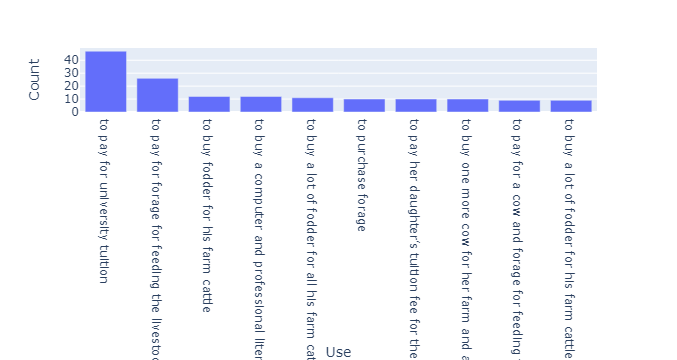

In [269]:
px.bar(reason_10, x = 'Use', y = 'Count')

#### 7. Top regions by loan amount.

EDA Question 4

#### 8. The correlation of the numerical values using a heatmap.

In [270]:
columns=['funded_amount', 'loan_amount','partner_id', 'term_in_months',
         'lender_count']
num_corr = armenia_loans[columns].corr()
#Removing the unnecessary data
# num_corr = num_corr.drop(['id', 'partner_id'], axis = 'columns')
# num_corr = num_corr.drop(['id', 'partner_id'], axis = 'rows')
num_corr

,funded_amount,loan_amount,partner_id,term_in_months,lender_count
funded_amount,1.000000,0.809945,0.310805,0.329219,0.833469
loan_amount,0.809945,1.000000,0.342344,0.418374,0.622002
partner_id,0.310805,0.342344,1.000000,0.271553,0.174976
term_in_months,0.329219,0.418374,0.271553,1.000000,0.281319
lender_count,0.833469,0.622002,0.174976,0.281319,1.000000


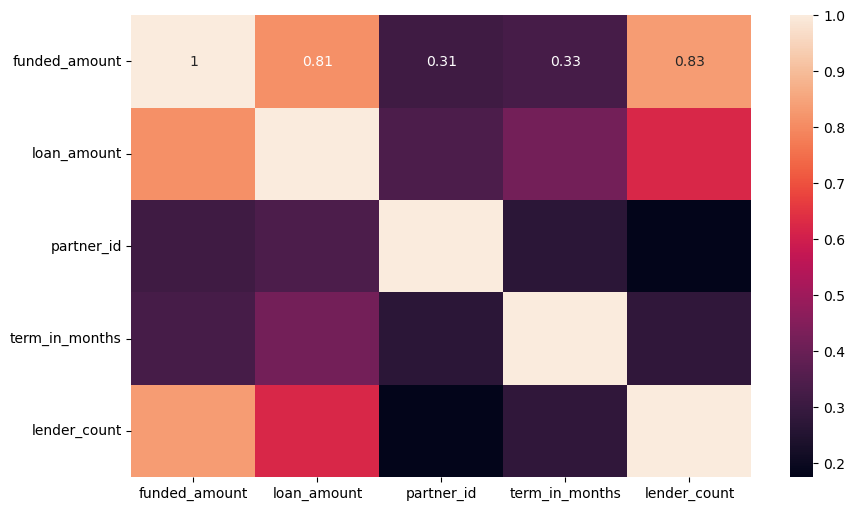

In [271]:
sns.heatmap(num_corr, annot = True)
plt.show()

#### 9. The distribution of the loan amount.

In [272]:
print(armenia_loans['loan_amount'].value_counts().head(20))

loan_amount
1500.0    826
3000.0    729
1475.0    666
1050.0    519
2100.0    466
1000.0    301
2000.0    269
2075.0    268
1450.0    239
850.0     230
650.0     223
625.0     221
1275.0    209
1075.0    189
1250.0    180
750.0     160
1225.0    145
425.0     137
2500.0    134
1200.0    105
Name: count, dtype: int64


C:\Users\dicks\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



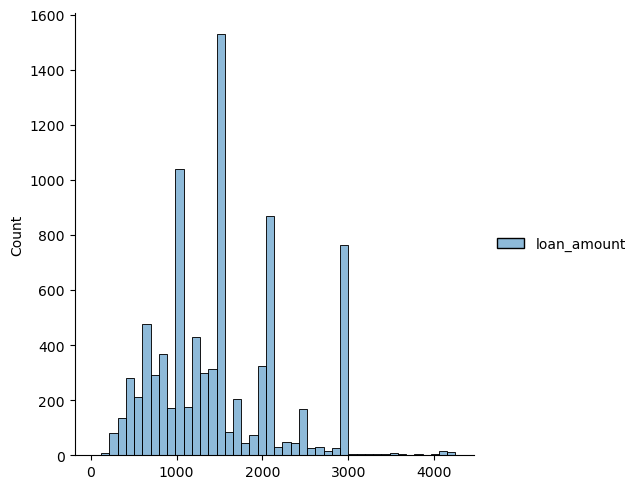

In [273]:
# pd.set_option("mode.copy_on_write", False) 
sns.displot(armenia_loans[['loan_amount']])
plt.show()

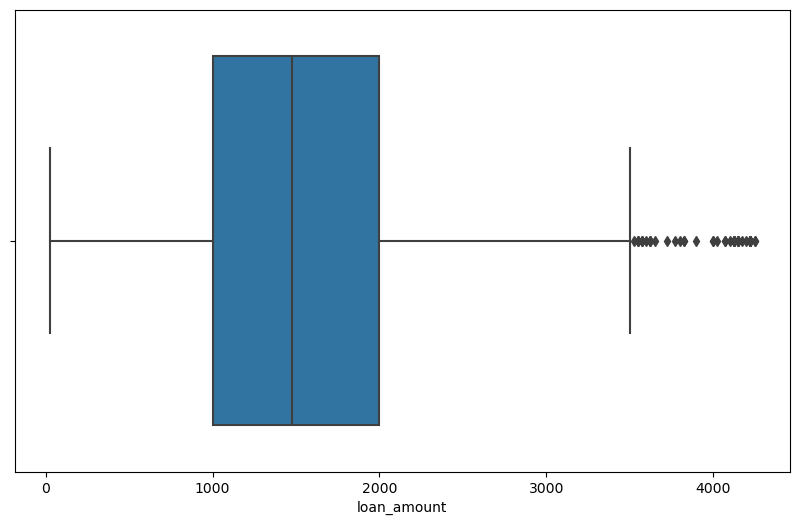

In [274]:
sns.boxplot(x = armenia_loans['loan_amount'])
plt.show()

###### Most common loan amount range in Armenia (Brackets of $500)

In [275]:
#Most common loan range
armenia_loans['loan_amount'].max() #4250
armenia_loans['loan_amount'].min() #25

#Classifying the loan into ranges of 100
loan_range = pd.cut(armenia_loans['loan_amount']
                    , np.linspace(0, 4500, 10)).value_counts()

loan_range = loan_range.reset_index()
loan_range.columns = ['loan_range', 'loan_count']
loan_range['percentage'] = loan_range['loan_count']/loan_range['loan_count'].sum()*100
loan_range

,loan_range,loan_count,percentage
0,"(1000.0, 1500.0]",3445,39.914263
1,"(500.0, 1000.0]",1818,21.063608
2,"(2000.0, 2500.0]",1193,13.822269
3,"(2500.0, 3000.0]",859,9.952497
4,"(1500.0, 2000.0]",738,8.550574
5,"(0.0, 500.0]",506,5.862588
6,"(4000.0, 4500.0]",28,0.324412
7,"(3000.0, 3500.0]",24,0.278067
8,"(3500.0, 4000.0]",20,0.231723


C:\Users\dicks\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



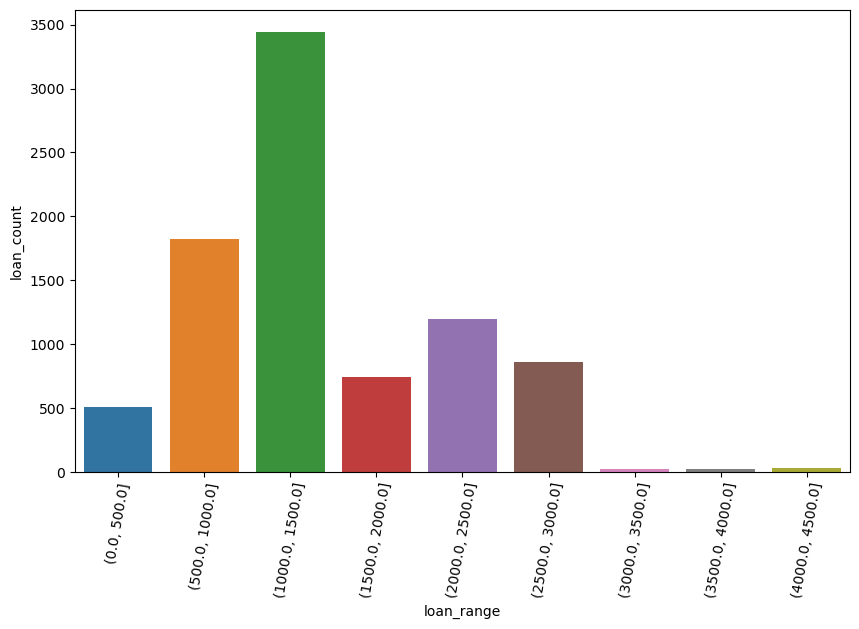

In [293]:
#Visualizing loan ranges' popularity 
sns.barplot(data = loan_range, x = 'loan_range', y = 'loan_count')
plt.xticks(rotation = 80)
plt.show()

#### Conclusions
 > 1. Common loan range is between (1000 - 1500]

#### 10. The distribution of the funded amount.

> Similar above

#### 11. The distribution of the repayment term.

In [277]:
repay = armenia_loans[
    'repayment_interval'].value_counts().reset_index()
#Repayment terms in %
repay['percentage'] = round(repay['count']/repay['count'].sum()*100, 3)
repay

,repayment_interval,count,percentage
0,monthly,8418,97.532
1,irregular,170,1.970
2,bullet,43,0.498


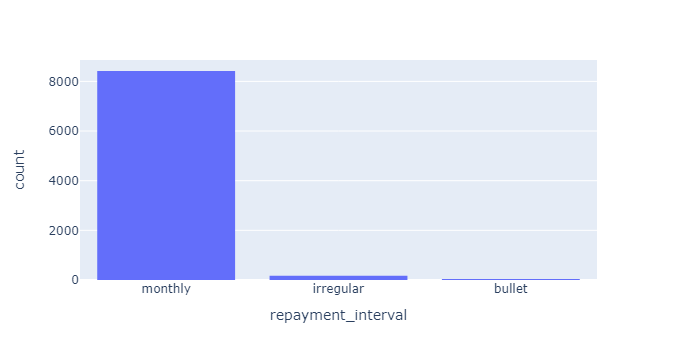

In [278]:
px.histogram(armenia_loans, x = 'repayment_interval')

#### 12. The lender count against the funded amount. Explain the obtained results. (Needs Clarification)

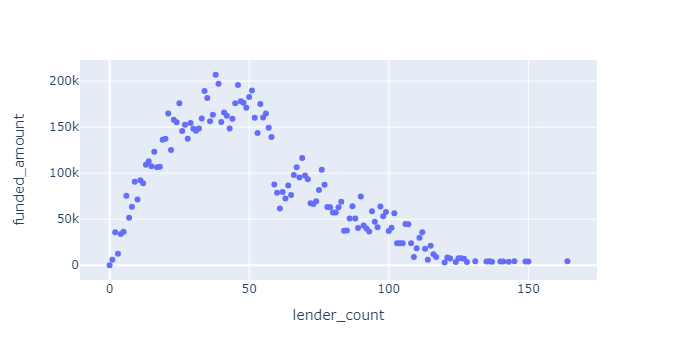

In [279]:
lender_funded = armenia_loans.groupby(
    'lender_count')['funded_amount'].sum().reset_index()
px.scatter(lender_funded, x = 'lender_count', y = 'funded_amount')

#### 13. The distribution of the funded amount by region.

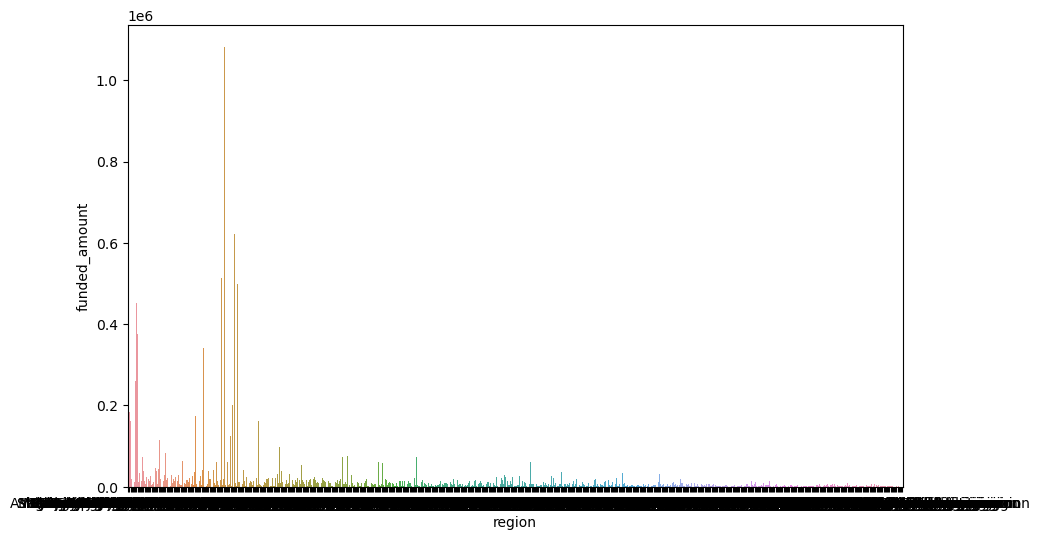

In [280]:
sns.barplot(data = armenia_loans, x = 
            'region', y = 'funded_amount', errorbar = None
            , estimator = np.sum)
plt.show()

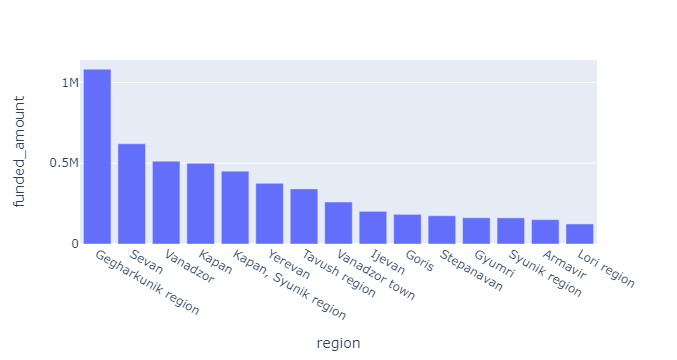

In [281]:
#Visualizing top 10 
fund_region = armenia_loans.groupby('region')[
    'funded_amount'].sum().sort_values(
    ascending = False).reset_index()
fund_region = fund_region[0:15]
px.bar(fund_region, x = 'region', y = 'funded_amount')

#### 14. The funded amount with the sector as the hue. 
Not clear relational plot of what factors (presumed fund, region)

C:\Users\dicks\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



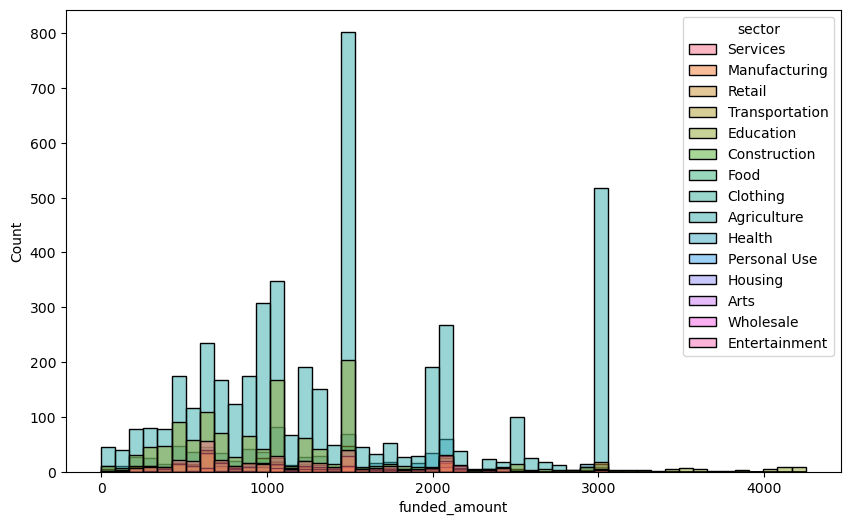

In [282]:
sns.histplot(data = armenia_loans, x = 'funded_amount', hue = 'sector')
plt.show()

In [283]:
#fund_region_sec = armenia_loans.groupby(['region','sector'])[
    #'funded_amount'].sum().sort_values(
   # ascending = False).reset_index()
#fund_region_sec = fund_region_sec[0:20]
#fund_region_sec

#sns.barplot(data = fund_region_sec, x = 
          #  'region', y = 'funded_amount', hue = 'sector')
#plt.xticks(rotation = 70)
#plt.legend(loc = 'upper right')
#plt.show()

#### 15. A boxplot of regions against funded amount.

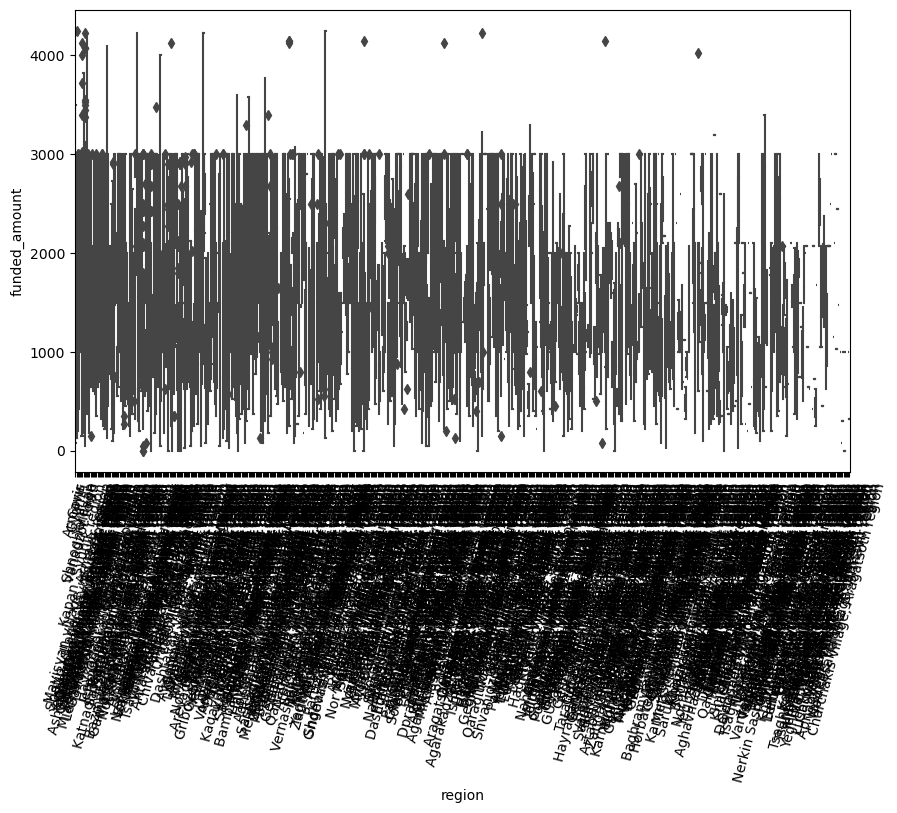

In [284]:
sns.boxplot(data = armenia_loans, x="region"
            , y="funded_amount")
plt.xticks(rotation = 75)

plt.show()

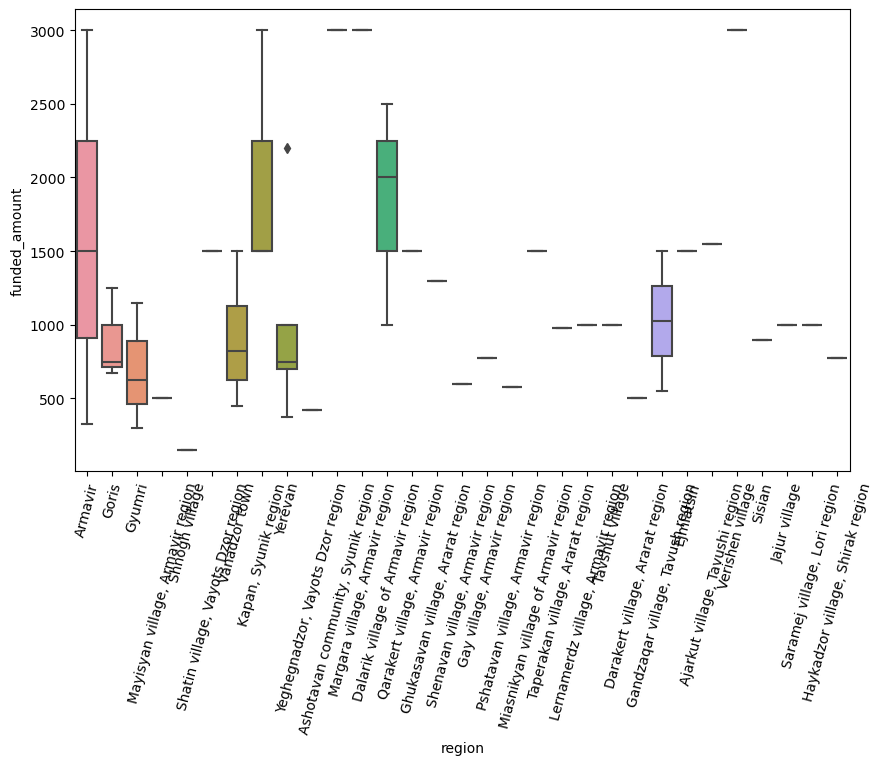

In [285]:
#First 20 record dist
sort = armenia_loans[0:50]

sns.boxplot(data = sort, x ="region"
           , y="funded_amount")
plt.xticks(rotation = 75)
plt.show()

#### 16. The repayment interval for different regions.

#### 17. Boxplots of the loan amount in sectors.

#### 18. Sector-wise classification of loans based on top sectors for the top 20 regions.

#### 19. The number of field partners per region. (MPI dataset)

#### 20. The months and the total number of loans in that month.

In [295]:
armenia_loans['disbursed_time']

2324      2013-12-24 08:00:00+00:00
2332      2013-12-27 08:00:00+00:00
2357      2013-12-28 08:00:00+00:00
2395      2013-12-10 08:00:00+00:00
2425      2013-12-10 08:00:00+00:00
                    ...            
670368    2017-06-27 07:00:00+00:00
670413    2017-06-29 07:00:00+00:00
670426    2017-06-28 07:00:00+00:00
670427    2017-07-06 07:00:00+00:00
670449    2017-06-28 07:00:00+00:00
Name: disbursed_time, Length: 8631, dtype: object

In [286]:
pd.set_option('copy_on_write', True)
armenia_loans['disbursed_time'] = pd.to_datetime(armenia_loans[
    'disbursed_time'], format='%d%b%Y:%H:%M:%S.%f')

ValueError: time data "2013-12-24 08:00:00+00:00" doesn't match format "%d%b%Y:%H:%M:%S.%f", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
pd.set_option('copy_on_write', False)

In [ ]:
armenia_loans['month'] = armenia_loans['disbursed_time'].dt.month
armenia_loans

In [ ]:
plt.title('Distribution of Loans per Month')

ax = sns.countplot(data = armenia_loans, x = 'month')
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height()
                , (p.get_x() + p.get_width() / 2., p.get_height()),ha = 'center'
                , va = 'center', xytext = (0, 5)
                , textcoords = 'offset points')

plt.show()

#### 21. The number of regions.

#### 22. The number of loans per region.

#### 23. The number of loans per sector.

#### 24. The distribution of the disbursed time of the loans.

#### 25. The distribution of the funded time of the loans.

Countries with most loans: Philippines, Kenya, El Salvador, Cambodia, Pakistan. Armenia (no 17)

Strong r/ship between country reference and Loan Quantity – cumulative effect

Agriculture & food are sectors with highest loan amount globally

Goma, North Kivu province- Region with highest loans globally

#### Armenia
> Agricultural sector receiving OVER half the number of loans Armenia (53.6%)

> Entertainment - Least number of loans & Quantity

> Strong r/ship between No_of_loan & Quantity of Loan

> Farming ACTIVITY- Highest Loan amount

> Gegharkunik region HIGHEST loan amout 

> Monthly repayment is the most common

> Feamles taking more loans (62.3%): leading sectors by gender:
1. Females : Agri, Edu, Health, Clothing
2. Males: Agri, Health, Edu, Services

> Most loans by SEF International 

> To pay for university tuition top reason for loan

> 1500 loan amount most common in terms os ranges 1000-1500 (39.95), 500-1000(21%) – marketing 
